In [1]:
import pandas as pd

df = pd.read_csv("raw_visa_data.csv")
df.head()


,application_id,age,gender,visa_type,documents_submitted,visa_granted,rejection_reason
0,AUS100000,53,Male,Visit Visa,"Passport, Travel Insurance, Invitation Letter",No,Academic documents incomplete
1,AUS100001,58,Female,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,NaN
2,AUS100002,58,Other,Student Visa,"Passport, Offer Letter, Medical Certificate, E...",No,Missing documents
3,AUS100003,38,Male,Visit Visa,"Passport, Bank Statement, Travel Insurance, In...",No,Missing documents
4,AUS100004,26,Male,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,NaN


In [2]:
df.isnull().sum()


application_id            0
age                       0
gender                    0
visa_type                 0
documents_submitted       0
visa_granted              0
rejection_reason       8573
dtype: int64

In [4]:
# Fill missing numeric values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing text values
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
df.to_csv("cleaned_visa_data.csv", index=False)


In [7]:
df.isnull().sum()

application_id         0
age                    0
gender                 0
visa_type              0
documents_submitted    0
visa_granted           0
rejection_reason       0
dtype: int64

In [3]:
import pandas as pd

df = pd.read_csv("cleaned_visa_data.csv")
df.head()


,application_id,age,gender,visa_type,documents_submitted,visa_granted,rejection_reason
0,AUS100000,53,Male,Visit Visa,"Passport, Travel Insurance, Invitation Letter",No,Academic documents incomplete
1,AUS100001,58,Female,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,Insufficient funds
2,AUS100002,58,Other,Student Visa,"Passport, Offer Letter, Medical Certificate, E...",No,Missing documents
3,AUS100003,38,Male,Visit Visa,"Passport, Bank Statement, Travel Insurance, In...",No,Missing documents
4,AUS100004,26,Male,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,Insufficient funds


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


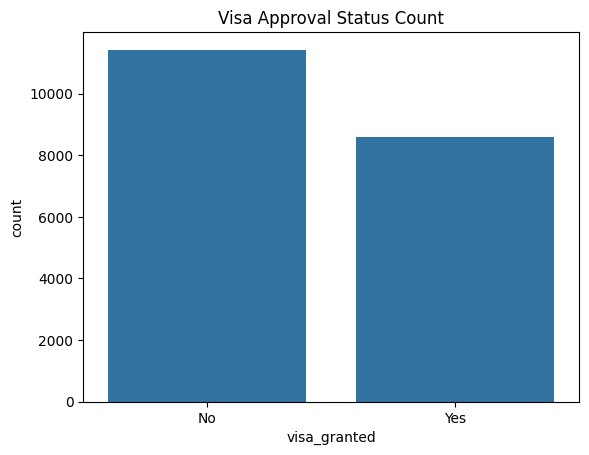

In [4]:
sns.countplot(x='visa_granted', data=df)
plt.title("Visa Approval Status Count")
plt.show()


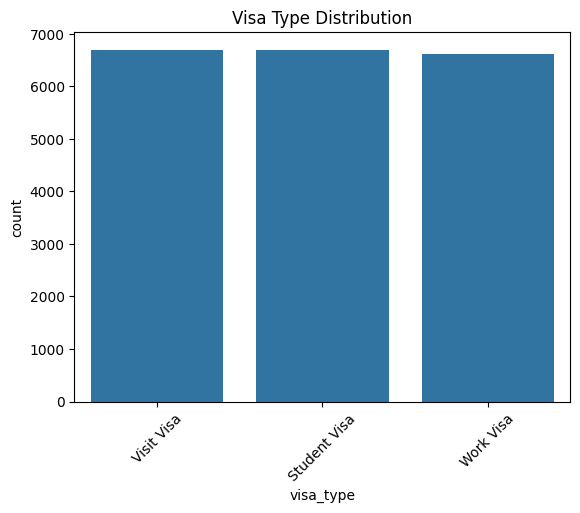

In [5]:
sns.countplot(x='visa_type', data=df)
plt.title("Visa Type Distribution")
plt.xticks(rotation=45)
plt.show()


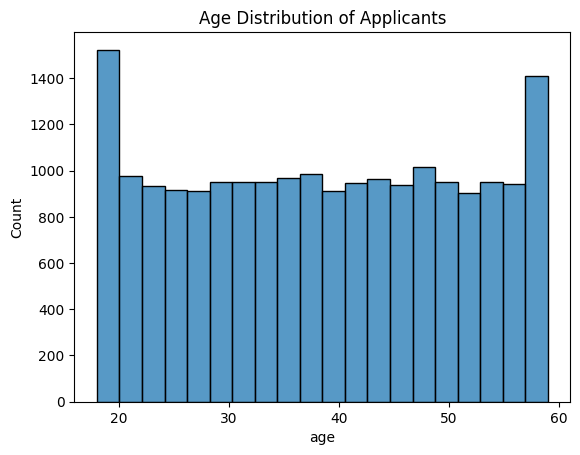

In [6]:
sns.histplot(df['age'], bins=20)
plt.title("Age Distribution of Applicants")
plt.show()


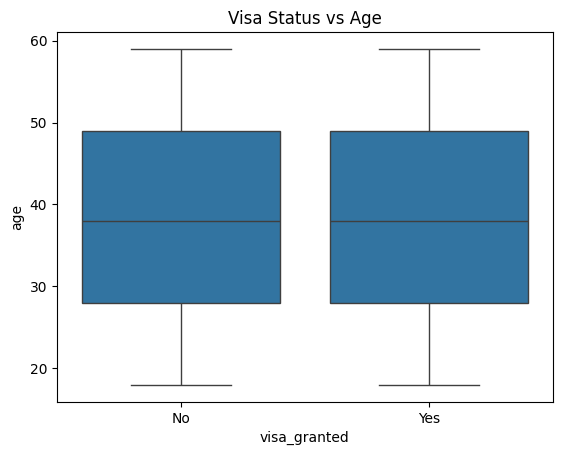

In [7]:
sns.boxplot(x='visa_granted', y='age', data=df)
plt.title("Visa Status vs Age")
plt.show()


In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'AUS100000'

<Figure size 800x600 with 0 Axes>

In [9]:
numeric_df = df.select_dtypes(include='number')

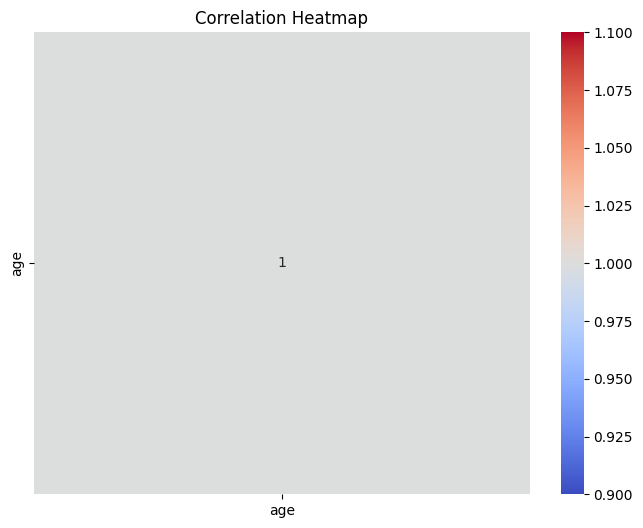

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df['is_young_applicant'] = df['age'] < 30


In [12]:
df.to_csv("final_visa_data.csv", index=False)


In [13]:
df.head()


,application_id,age,gender,visa_type,documents_submitted,visa_granted,rejection_reason,is_young_applicant
0,AUS100000,53,Male,Visit Visa,"Passport, Travel Insurance, Invitation Letter",No,Academic documents incomplete,False
1,AUS100001,58,Female,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,Insufficient funds,False
2,AUS100002,58,Other,Student Visa,"Passport, Offer Letter, Medical Certificate, E...",No,Missing documents,False
3,AUS100003,38,Male,Visit Visa,"Passport, Bank Statement, Travel Insurance, In...",No,Missing documents,False
4,AUS100004,26,Male,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,Insufficient funds,True
